Desafio: Técnicas de programação II

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#leitura do banco de dados
df_doctoralia = pd.read_csv("202210_doctoralia_br.csv")
df_doctoralia.head()

In [3]:
#informações do banco de dados
df_doctoralia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165062 entries, 0 to 165061
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   doctor_id           165062 non-null  int64  
 1   title               117188 non-null  object 
 2   name                165062 non-null  object 
 3   city1               164972 non-null  object 
 4   city2               164972 non-null  object 
 5   region              92048 non-null   object 
 6   specialization      165042 non-null  object 
 7   reviews             85350 non-null   float64
 8   newest_review_date  85350 non-null   object 
 9   telemedicine        165062 non-null  int64  
 10  price               36650 non-null   object 
 11  url                 165062 non-null  object 
 12  fetch_time          165062 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 16.4+ MB


In [4]:
#transformar os valores de price em float
df_doctoralia['price'] = pd.to_numeric(df_doctoralia['price'], errors='coerce')

In [5]:
#Remover outliers 
q1 = df_doctoralia["price"].quantile(0.25)
q3 = df_doctoralia["price"].quantile(0.75)
iqr = q3-q1 
lower  = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
df_doc = df_doctoralia.loc[(df_doctoralia["price"] > lower) & (df_doctoralia["price"] < upper)]
df_doc

,doctor_id,title,name,city1,city2,region,specialization,reviews,newest_review_date,telemedicine,price,url,fetch_time
1,424668,Dra.,Marcia Toraiwa Iwashita,São Paulo,sao-paulo,sao-paulo-sp,alergista,41.0,2022-10-25T13:28:19-03:00,1,600.0,http://www.doctoralia.com.br/marcia-toraiwa-iw...,2022-10-28 20:55:02
2,758125,Dra.,Pamela Fernanda Alves Barbosa,São Paulo,sao-paulo,sao-paulo-sp,alergista,19.0,2022-10-19T21:24:28-03:00,0,490.0,http://www.doctoralia.com.br/pamela-fernanda-a...,2022-10-28 20:55:05
3,544831,Dra.,Marilene Ricci Ganem,São Paulo,sao-paulo,sao-paulo-sp,alergista,114.0,2022-10-18T12:21:51-03:00,1,300.0,http://www.doctoralia.com.br/marilene-ricci-ganem,2022-10-28 20:55:06
4,719643,Dra.,Gabriela De Oliveira Ferreira,Campina Grande,campina-grande,paraiba-pb,alergista,164.0,2022-10-28T12:03:08-03:00,1,350.0,http://www.doctoralia.com.br/gabriela-de-olive...,2022-10-28 20:55:08
5,382053,Dra.,Lucia Cavalcanti,Rio de Janeiro,rio-de-janeiro,rio-de-janeiro-rj,alergista,36.0,2022-10-27T14:36:57-03:00,1,350.0,http://www.doctoralia.com.br/lucia-cavalcanti,2022-10-28 20:55:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165010,736567,Dra.,Gisele Carniel,Ribeirão Preto,ribeirao-preto,sao-paulo-sp,psicologo,18.0,2021-09-10T21:21:13-03:00,0,140.0,http://www.doctoralia.com.br/gisele-carniel-2,2022-11-02 22:09:10
165011,419950,Prof.,Sérgio Silva,Marília,marilia,sao-paulo-sp,psicologo,18.0,2021-09-29T22:04:20-03:00,0,165.0,http://www.doctoralia.com.br/sergio-silva,2022-11-02 22:09:17
165052,532978,NaN,Maira Coelho,Belém do Pará,belem-do-para,para-pa,nutricionista,NaN,NaN,0,260.0,http://www.doctoralia.com.br/maira-coelho,2022-11-02 22:15:08
165059,708606,NaN,Carla Riera,Belo Horizonte,belo-horizonte,minas-gerais-mg,nutricionista,NaN,NaN,0,200.0,http://www.doctoralia.com.br/carla-riera,2022-11-02 22:15:19


1. O preço da consulta é caro por causa da especialização ?
R = A especialização influência no preço da consulta. Fica bem claro essa informação no gráfico de preço médio da consulta por especialidade, onde é possivel observar a disparidade entre as especialidades. Sendo que o maior valor (R$456,15) cobrado pelo especialista em eprodução humana e o menor valor (R$80,25) cobrado pelo especialista em administração em saúde.  


In [6]:
#preço médio da consulta por especialidade
df_spe = df_doc.groupby("specialization").agg(
    price_spe = ('price', np.mean)).reset_index().sort_values(['price_spe'], ascending=False)
df_spe

,specialization,price_spe
38,especialista-em-reproducao-humana,456.153846
37,especialista-em-neonatologia,450.000000
44,geneticista,448.000000
49,hepatologista,425.833333
73,nutrologo,411.198895
...,...,...
39,fisioterapeuta,134.754321
81,patologista-clinico,125.555556
88,psicopedagogo,106.429104
85,podologista,95.021739


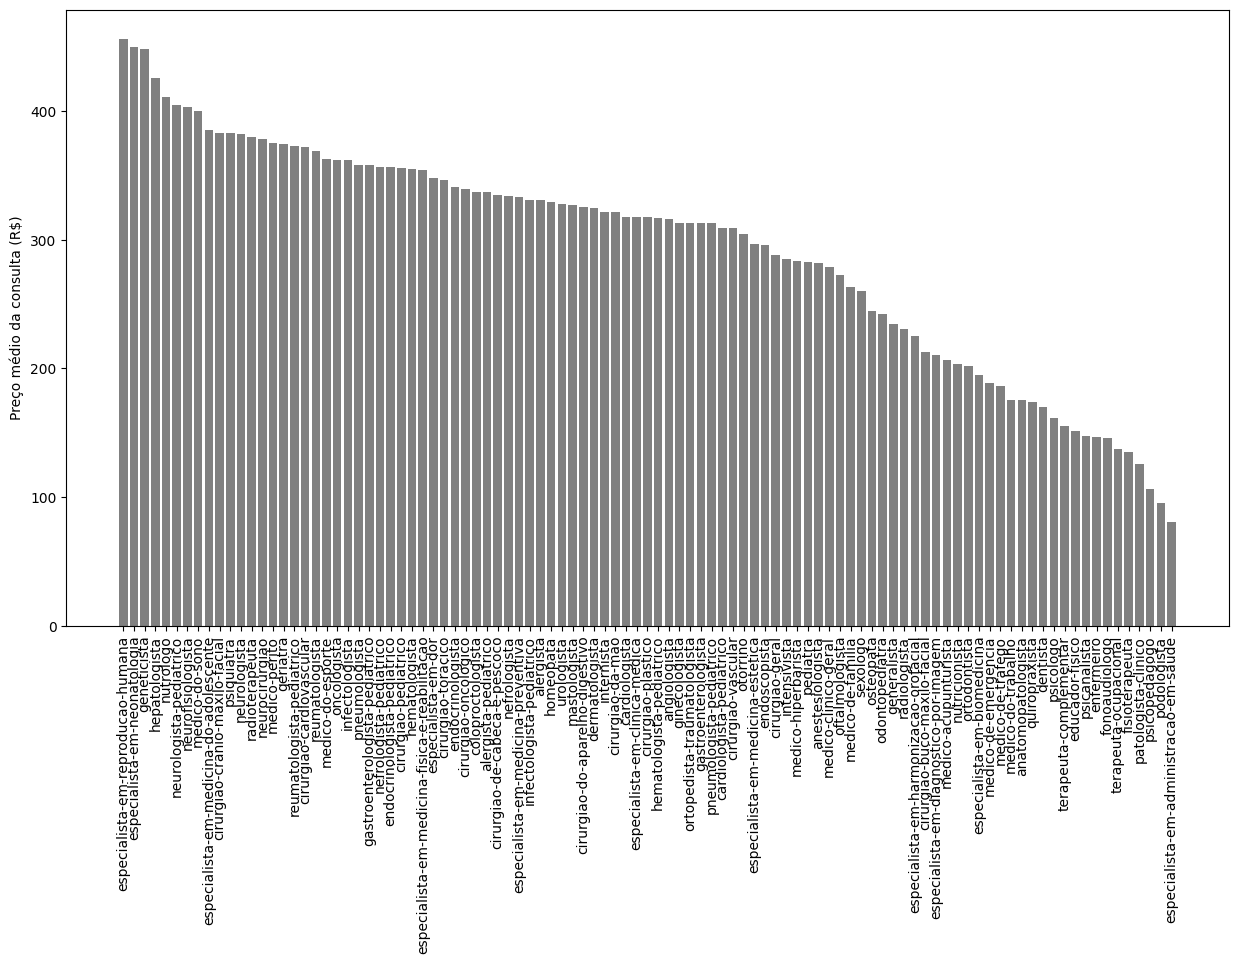

In [7]:
#gráfico preço médio da consulta por especialidade
fig, axarr = plt.subplots(1, 1, figsize=(15, 8))

plt.bar(df_spe['specialization'],df_spe['price_spe'], color='gray')
plt.ylabel('Preço médio da consulta (R$)')
plt.xticks( df_spe['specialization'], rotation='vertical')
plt.grid(False)
plt.show()

2. A consulta é cara por causa da região (cidade ou estado)? R= O valor da consulta varia tanto por região quanto por cidade. No gráfico de preço médio da consulta por estado e cidades é possivel observar a disparidade entre os estados e cidades.

In [8]:
#preço médio da consulta por região
df_region = df_doc.groupby(["region"]).agg(
    price_region = ('price', np.mean)).reset_index().sort_values(['price_region'], ascending=False)
df_region

,region,price_region
11,mato-grosso-mt,301.161435
17,piaui-pi,298.315385
10,mato-grosso-do-sul-ms,298.282828
22,roraima-rr,290.925926
6,distrito-federal-df,286.763832
24,sao-paulo-sp,286.673869
8,goias-go,283.517316
3,amazonas-am,281.352751
0,acre-ac,280.277778
26,tocantins-to,280.138889


In [9]:
#gráfico em barras preço por região
fig = px.bar(df_region, x='region', y='price_region', color_discrete_sequence=["gray"])

fig.update_layout(
    xaxis = dict(title='Estados'),
    yaxis=dict(title='Preço médio da consulta(R$)'),
    plot_bgcolor='white',
    showlegend=False
)
fig.update_layout(title={
    'text' : 'Preço médio da consulta por estado',
    'y': 0.9,
    'x': 0.5
    })
fig.show()

In [10]:
#preço médio da consulta por cidade
df_city = df_doc.groupby(["region", "city1"]).agg(
    price_city = ('price', np.mean)).reset_index().sort_values('price_city', ascending=False)
df_city

,region,city1,price_city
693,rio-grande-do-sul-rs,Alegrete,600.0
361,minas-gerais-mg,Jenipapo de Minas,600.0
154,espirito-santo-es,Afonso Cláudio,600.0
381,minas-gerais-mg,Monte Alegre de Minas,600.0
547,parana-pr,Prudentópolis,500.0
...,...,...,...
3,alagoas-al,Belo Monte,23.0
246,mato-grosso-do-sul-ms,Aparecida Do Taboado,20.0
443,minas-gerais-mg,Virgolândia,20.0
359,minas-gerais-mg,Jaiba,20.0


3. A quantidade de reviews influencia o preço da consulta? 
R= A quantidade de reviews que ummédico tem nãoinfluência no valor da consulta. O médico(a) com maior número de reviews cobra R$290,00 por consulta. Médicos(as) que poucos reviews apresentaram valores de consulta variados. Nada indica que haja correlação entre os dois dados observados.

In [11]:
#preço médio da consulta por reviews
df_reviews = df_doc.groupby("reviews").agg(
    price_reviews = ('price', np.mean)).reset_index().sort_values(['reviews'], ascending=False)
df_reviews.dropna()

,reviews,price_reviews
612,1442.0,290.000000
611,1370.0,100.000000
610,1349.0,300.000000
609,1270.0,250.000000
608,1230.0,150.000000
...,...,...
4,5.0,271.242382
3,4.0,269.176250
2,3.0,263.258206
1,2.0,260.142536


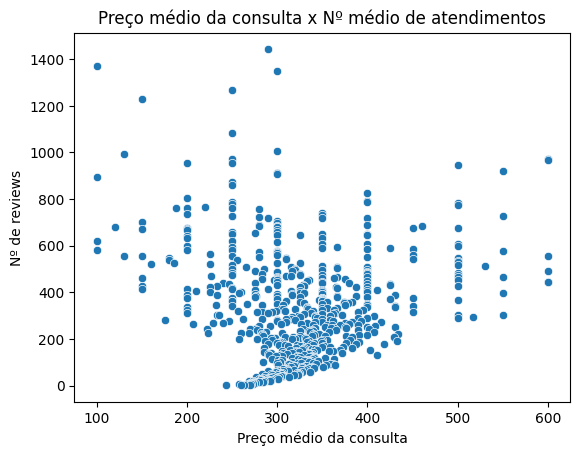

In [12]:
#gráfico de dispersão do preço médio da consulta versus o nº de reviews
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=df_reviews, x='price_reviews', y='reviews')
ax.set_xlabel("Preço médio da consulta")
ax.set_ylabel("Nº de reviews")
ax.set_title("Preço médio da consulta x Nº médio de atendimentos")
grid=(False)
plt.show()

4. Atender por telemedicina influencia o preço da consulta? R= Atender por telemedicina deixa o valor da consulta mais caro, para a maioria das epecialidades. Ainda é possivel observar que algumas poucas especialidades não possuem a possibilidade de atendimento nesse formato. Mas em termos gerais, o valor médio da consulta realiazada por profissionais que praticam a telemedicina é R$44,37 mais alto do que os que não praticam.  

In [13]:
#preço médio da consulta para telemedicina ou não
df_telemedicine = df_doc.groupby(["telemedicine"]).agg(
    price = ('price', np.mean)
).reset_index()
df_telemedicine

,telemedicine,price
0,0,249.857103
1,1,294.225110


<AxesSubplot: title={'center': 'Preço médio da consulta para a prática ou não de telemedicina'}, xlabel='Prática de telemedicina', ylabel='Preço médio da consulta (R$)'>

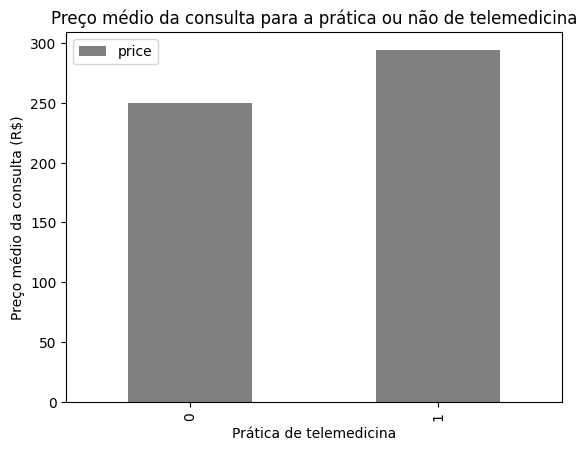

In [14]:
#gráfico em barras do preço médio da consulta por telemedicina ou não
df_telemedicine.plot.bar(x='telemedicine', y='price',
color='gray', grid=False, 
xlabel='Prática de telemedicina',
ylabel='Preço médio da consulta (R$)', 
title="Preço médio da consulta para a prática ou não de telemedicina")

In [16]:
#preço médio da consulta por especialista que pratica ou não telemedicina
df_telemedicine = df_doc.groupby(["specialization", "telemedicine"]).agg(
    price = ('price', np.mean)
).reset_index()
df_telemedicine
a = df_telemedicine[:30]
b = df_telemedicine[31:61]
c = df_telemedicine[62:92]
d = df_telemedicine[93:123]
e = df_telemedicine[124:154]
f = df_telemedicine[155:185]

<AxesSubplot: xlabel='specialization'>

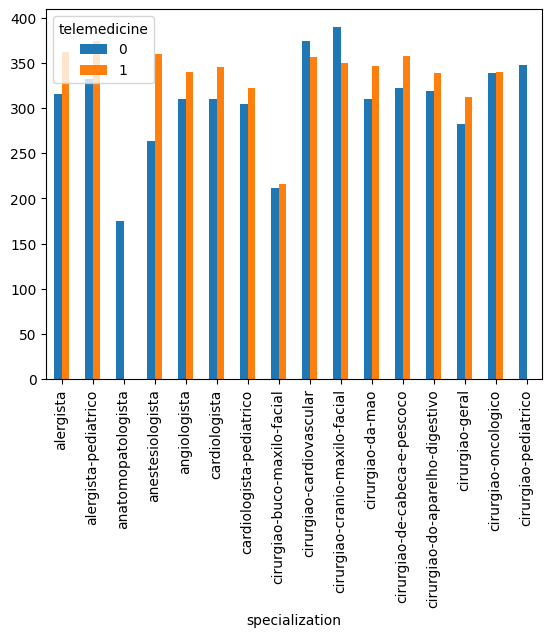

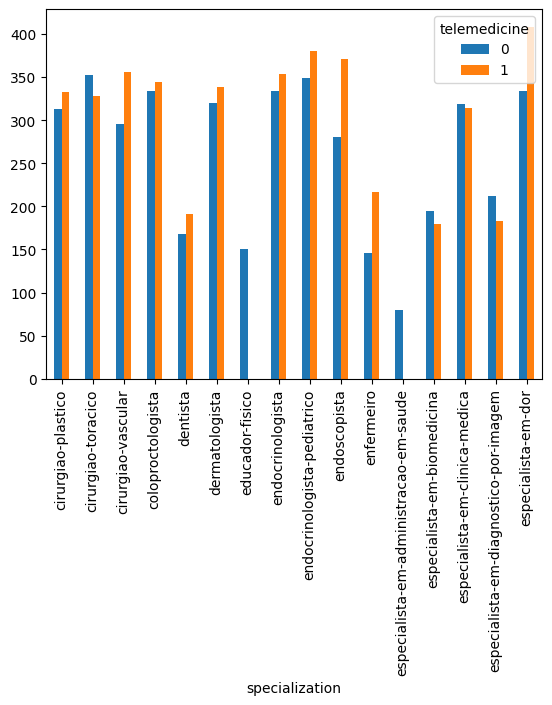

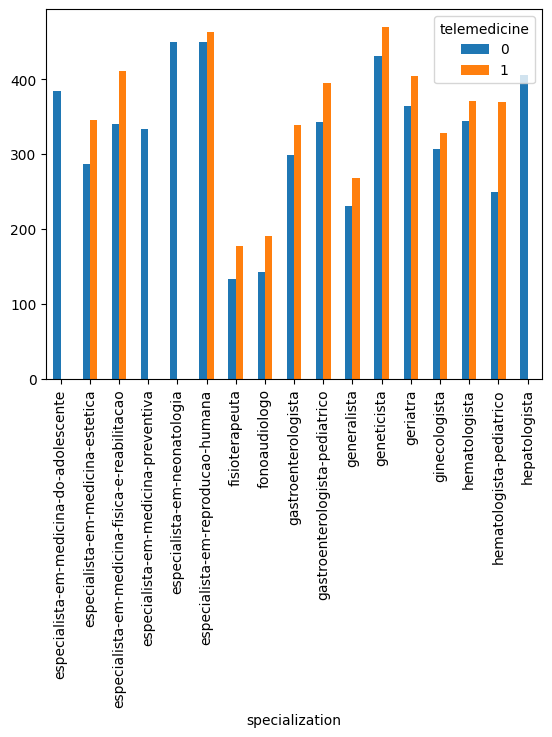

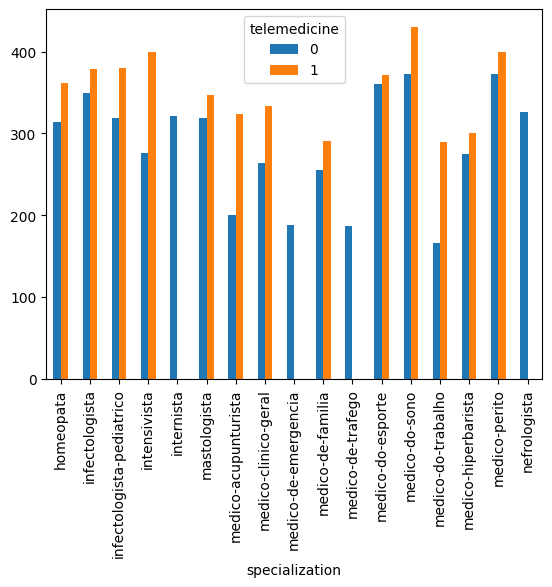

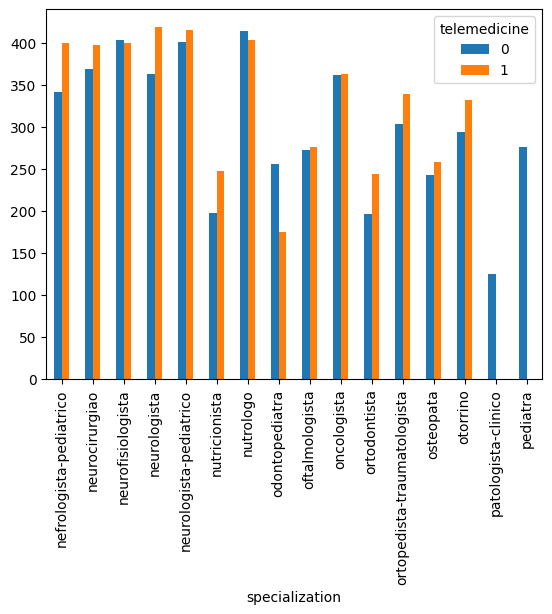

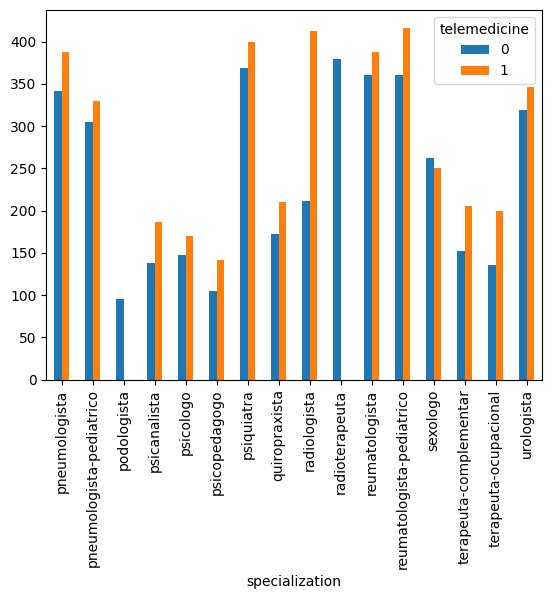

In [17]:
#gráfico em barra com o preço médio da consulta por especialista que pratica ou não telemedicina
a.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')
b.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')
c.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')
d.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')
e.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')
f.pivot(index='specialization', columns='telemedicine', values='price').plot(kind='bar')

5. Gênero X Preço R=Quando realizado uma comparação do preço médio da consulta por gênero, é possivel observar que homens cobram em média R$ 22.73 a mais pela consulta do que as mulheres

In [18]:
#Preço médio da consulta de acordo com o título
df_title = df_doc.groupby(["title"]).agg(
    price_title = ('price', np.mean)
).reset_index()
df_title

,title,price_title
0,Dr.,304.114447
1,Dra.,281.386234
2,Prof.,240.337553


In [19]:
#Preço médio da consulta de acordo com o gênero
df_sex = df_title.replace("Prof.", np.nan)

df_sex.dropna()

,title,price_title
0,Dr.,304.114447
1,Dra.,281.386234


In [20]:
# Gráfico de barras com a média da consulta de acordo com o gênero
fig = px.bar(df_sex, x='title', y="price_title", color_discrete_sequence=["gray"])

fig.update_layout(
    xaxis = dict(title='Gênero'),
    yaxis=dict(title='Preço médio (R$)'),
    plot_bgcolor='white',
    showlegend=False
)
fig.update_layout(title={
    'text' : 'Preço médio da consulta versus gênero',
    'y': 0.9,
    'x': 0.5
    })
fig.show()

6. Região/Cidade x preço R=Aqui é possivel confirmar o que foi apresentado no item 2.

In [ ]:
#nordeste
ax1 = df_city.loc[df_city['region'] == 'alagoas-al']
sns.catplot(data=ax1, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado de Alagoas") 
plt.show()

ax2 = df_city.loc[df_city['region'] == 'bahia-ba']
sns.catplot(data=ax2, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado da Bahia") 
plt.show()

ax3 = df_city.loc[df_city['region'] == 'ceara-ce']
sns.catplot(data=ax3, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado do Ceará") 
plt.show()

ax4 = df_city.loc[df_city['region'] == 'piaui-pi']
sns.catplot(data=ax4, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado do Piauí") 
plt.show()

ax5 = df_city.loc[df_city['region'] == 'sergipe-se']
sns.catplot(data=ax5, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado de Sergipe") 
plt.show()

ax6 = df_city.loc[df_city['region'] == 'maranhao-ma']
sns.catplot(data=ax6, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado do Maranhão") 
plt.show()

ax7 = df_city.loc[df_city['region'] == 'rio-grande-do-norte-rn']
sns.catplot(data=ax7, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidadesdo estado do rio Grande do Norte") 
plt.show()

ax8 = df_city.loc[df_city['region'] == 'pernambuco-pe']
sns.catplot(data=ax8, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado de Pernambuco") 
plt.show()

ax9 = df_city.loc[df_city['region'] == 'paraiba-pb']
sns.catplot(data=ax9, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidades do estado da Paraíba") 
plt.show()

In [ ]:
#Sudeste
ax17 = df_city.loc[df_city['region'] == 'rio-de-janeiro-rj']
sns.catplot(data=ax17, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax18 = df_city.loc[df_city['region'] == 'espirito-santo-es']
sns.catplot(data=ax18, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax19 = df_city.loc[df_city['region'] == 'sao-paulo-sp']
sns.catplot(data=ax19, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax20 = df_city.loc[df_city['region'] == 'minas-gerais-mg']
sns.catplot(data=ax20, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()


In [ ]:
#sul
ax21 = df_city.loc[df_city['region'] == 'rio-grande-do-sul-rs']
sns.catplot(data=ax21, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade")
plt.show()

ax22 = df_city.loc[df_city['region'] == 'parana-pr']
sns.catplot(data=ax22, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade")
plt.show()

ax23 = df_city.loc[df_city['region'] == 'santa-catarina-sc']
sns.catplot(data=ax23, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

In [ ]:
#centro-oeste
ax24 = df_city.loc[df_city['region'] == 'mato-grosso-do-sul-ms']
sns.catplot(data=ax24, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax25 = df_city.loc[df_city['region'] == 'mato-grosso-mt']
sns.catplot(data=ax25, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax26 = df_city.loc[df_city['region'] == 'goias-go']
sns.catplot(data=ax26, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()

ax27 = df_city.loc[df_city['region'] == 'distrito-federal-df']
sns.catplot(data=ax27, x='price_city', y='city1', kind="bar")
plt.xlabel( "Preço médio da consulta (R$)") 
plt.ylabel( "Cidade") 
plt.show()


In [ ]:
# queremos apenas dois tipos de combustível
produtos = ['ETANOL HIDRATADO', 'GASOLINA COMUM']
regioes = df['REGIÃO'].unique()

fig, (ax1, ax2) = plt.subplots(1,2,figsize = (15,6))

# dados do etanol
grouped_df_etanol = df[df['PRODUTO'] == 'ETANOL HIDRATADO']\
    .groupby(["REGIÃO", "DATA FINAL"])\
    ['PREÇO MÉDIO REVENDA']\
    .mean()\
    .unstack("REGIÃO")

# dados da gasolina
grouped_df_gasolina = df[df['PRODUTO'] == 'GASOLINA COMUM']\
    .groupby(["REGIÃO", "DATA FINAL"])\
    ['PREÇO M